Imports

In [19]:
import seaborn
import matplotlib
import pandas as pd
seaborn.set_theme()
%matplotlib inline

Load in csv dataframe

In [20]:
df = pd.read_csv("c:\\Users\\andy1\\Box\\Glenn Code\\Senior-Design-Shenanigans\\Fog16 feature extraction data.csv")
df.iloc[1:5]

,Unnamed: 0,timeSinceStart,MOR_meters,MeanVD_microns,ImageIndex,Vis_LapVar,Vis_LapMax,Vis_FFTVar,Vis_FFTMax,Inf_LapVar,Inf_LapMax,Inf_FFTVar,Inf_FFTMax
1,1,3.805,70.167191,0.238341,6,0.000101,1.600000,560.645879,378.325395,0.001059,0.735561,623.150277,447.288436
2,2,4.562,67.759429,0.235992,7,0.000103,1.639216,559.371565,378.052536,0.001044,0.729839,627.760392,444.848020
3,3,5.329,61.405357,0.237520,8,0.000105,1.647059,558.474030,378.324190,0.001070,0.752422,617.733081,444.018564
4,4,6.089,49.194987,0.239208,9,0.000112,1.572549,553.989072,378.095525,0.001084,0.758587,617.730051,444.776075


Eliminate columns not needed for visualization

In [21]:
df = df.drop(columns=['Unnamed: 0', 'timeSinceStart','ImageIndex'])
df.iloc[1:5]

,MOR_meters,MeanVD_microns,Vis_LapVar,Vis_LapMax,Vis_FFTVar,Vis_FFTMax,Inf_LapVar,Inf_LapMax,Inf_FFTVar,Inf_FFTMax
1,70.167191,0.238341,0.000101,1.600000,560.645879,378.325395,0.001059,0.735561,623.150277,447.288436
2,67.759429,0.235992,0.000103,1.639216,559.371565,378.052536,0.001044,0.729839,627.760392,444.848020
3,61.405357,0.237520,0.000105,1.647059,558.474030,378.324190,0.001070,0.752422,617.733081,444.018564
4,49.194987,0.239208,0.000112,1.572549,553.989072,378.095525,0.001084,0.758587,617.730051,444.776075


Get separate DataFrames for visible and infrared

In [22]:
df_visible = df[["MOR_meters", "MeanVD_microns", "Vis_LapVar", "Vis_LapMax", "Vis_FFTVar", "Vis_FFTMax"]]
df_infrared = df[["MOR_meters", "MeanVD_microns", "Inf_LapVar", "Inf_LapMax", "Inf_FFTVar", "Inf_FFTMax"]]


Use seaborn for visualization

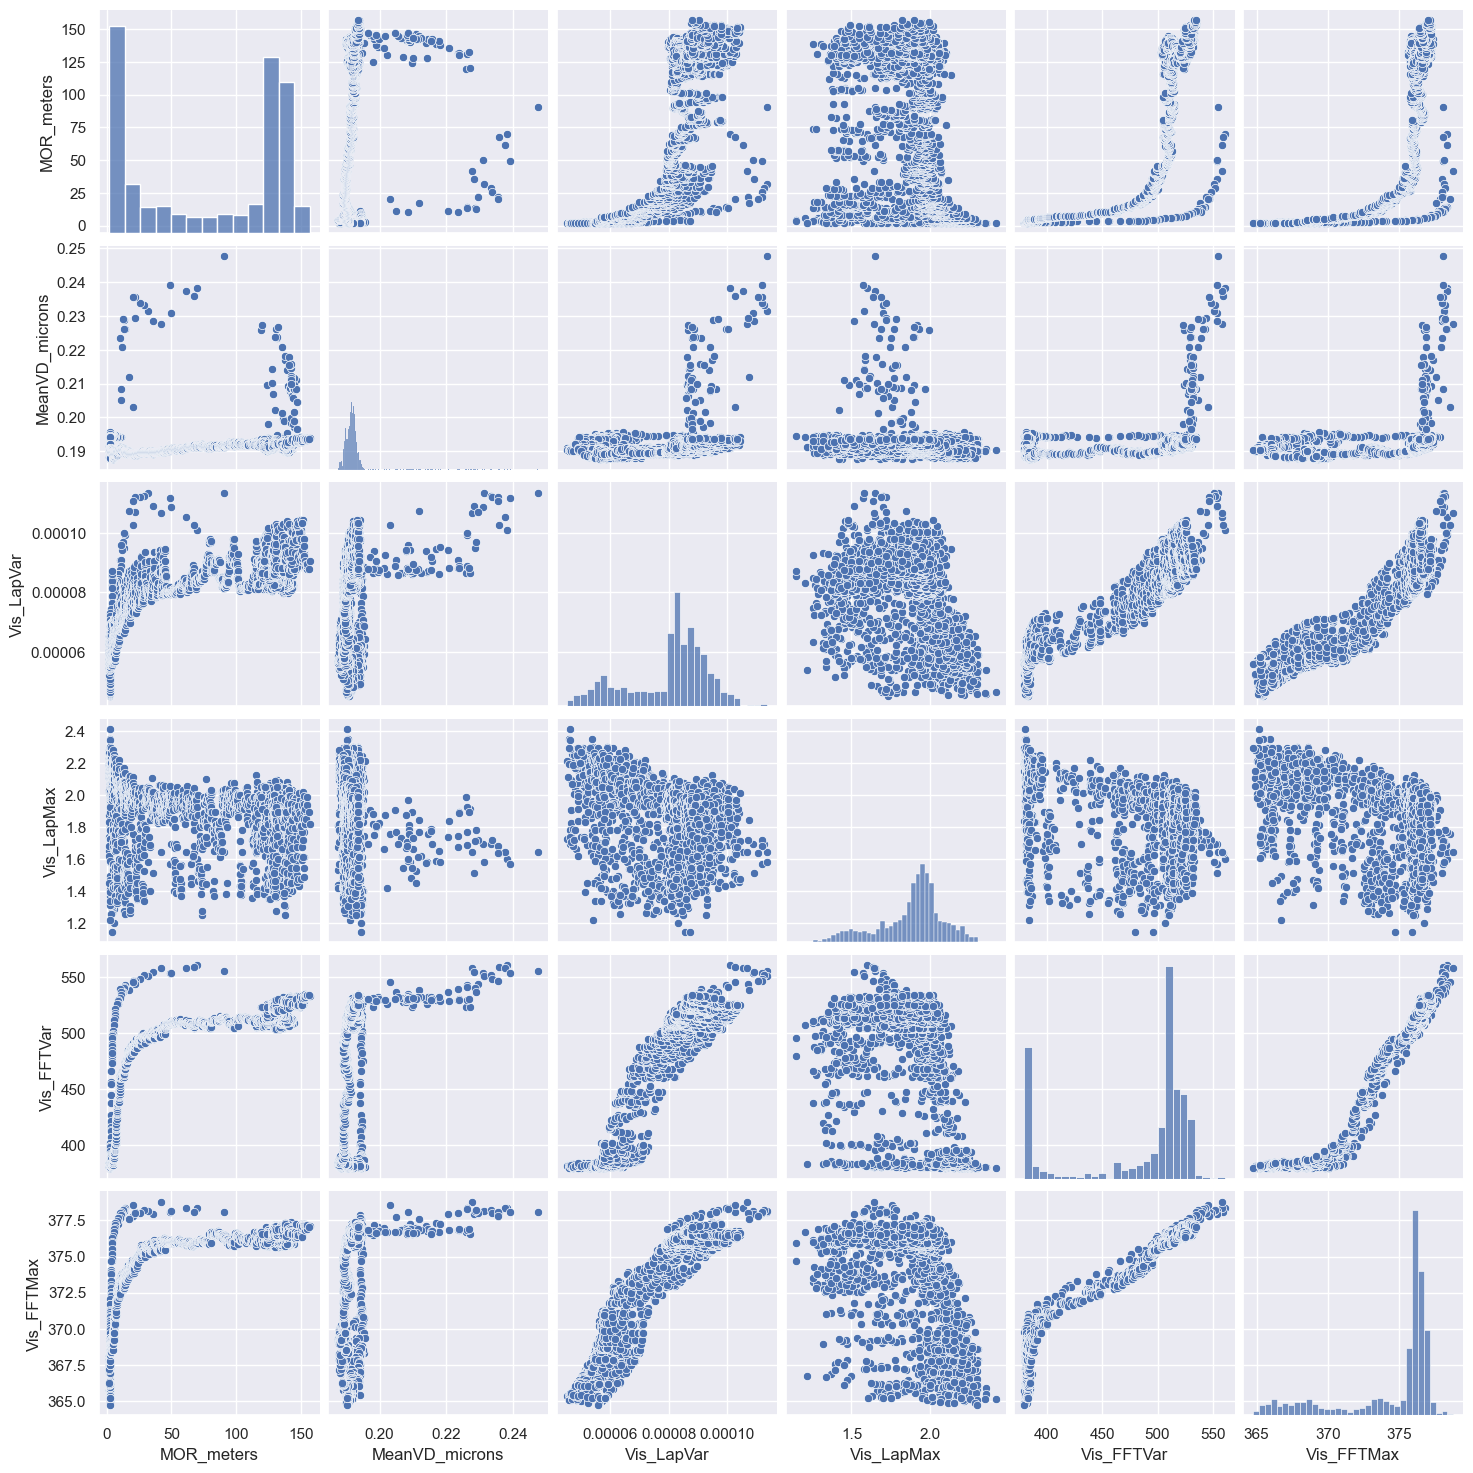

In [23]:
seaborn.pairplot(df_visible)

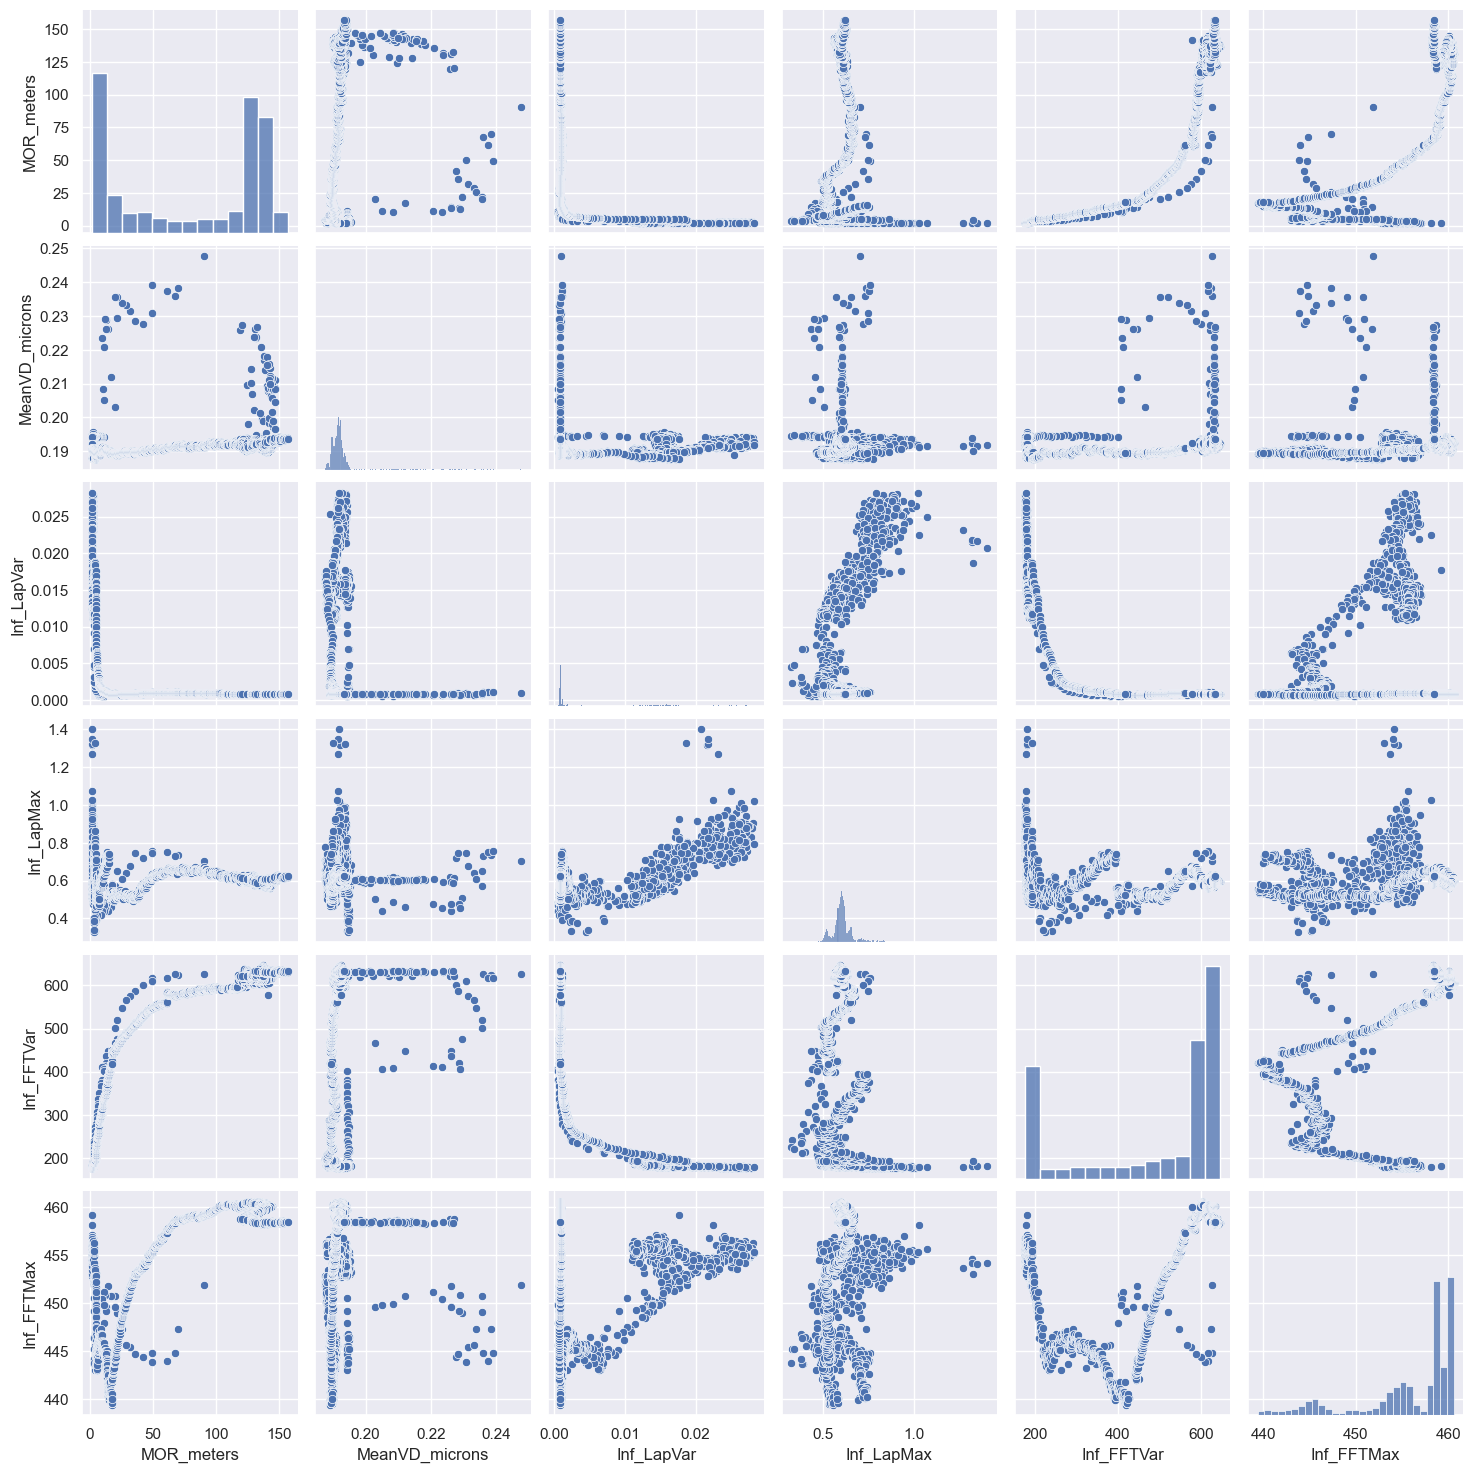

In [24]:
seaborn.pairplot(df_infrared)